#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto Módulo 2 Limpieza y preprocesado de datos
## Alumno: Manuel Deick

## Introducción

En la vida laboral de un científico de datos, la tarea más importante es realizar un buen análisis. Sin un entendimiento del problema, resultará difícil aplicar un buen modelo para su resolución. Por ello, ahora que comprendiste las técnicas revisadas a lo largo de este módulo, serás capaz de aplicar el tratamiento necesario de un conjunto de datos para su explotación.

## Demo

Este documento te servirá como inspiración para crear el tuyo: https://drive.google.com/file/d/1LKiMVyepbdTBK_Fs_9e6-y2ybB0Kem-Y/view?usp=sharing

## ¿Qué construirás?

Un análisis sobre un conjunto de datos para su posterior modelado. Este proyecto se dividirá en 4 secciones:

*   Análisis Exploratorio
*   Limpieza de datos
*   Procesamiento de datos
*   Reducción de dimensiones

## Criterios de evaluación

* Análisis Exploratorio: Calidad del análisis, entendimiento de las variables y estudio de las correlaciones con el objetivo. (25pts)
  - Excelente: Comprende la multicolinealidad entre las variables y señala gráficamente los valores atípicos en las distribuciones.
  - Suficiente: Comprende la relevancia de las variables e identifica las variables más significativas y cuales tienen mayor relación con el objetivo.

*   Limpieza de datos: Eliminación de faltantes, duplicados y atípicos de manera correcta, eligiendo el mejor modo para imputar valores faltantes. (25pts)

  - Excelente: Elimina los valores atí­picos y los imputa seleccionando a través de pruebas de hipótesis para justificarlo.
  - Suficiente: Elimina las variables que no cumplen con el criterio de completitud y se imputan los valores restantes.


*   Procesamiento de datos: Correcto uso de transformadores, justificando el porque se eligió uno sobre algún otro. (25pts)

  - Excelente: Transforma las variables de acuerdo a su naturaleza utilizando distintos métodos para escalar dependiendo de los valores de cada variable.
  - Transforma las variables categóricas y variables continuas.

*   Reducción de dimensiones: Selección de la mejor técnica para reducir las dimensiones, además de justificar el porque se esta reduciendo a cierto número sobre cualquier otro. (25pts)

  - Excelente: Elige el óptimo número de dimensiones de acuerdo a varias técnicas, justificando el porque se eligió el número de dimensiones final.
  - Suficiente: Reduce el conjunto de datos propuesto para una correcta reducción de nuestro set de datos.


## Objetivos

El participante:

* Realizará un correcto análisis y tratamiento de datos, el cuál le permita preparar y limpiar los datos de la forma más adecuada para utilizarlos posteriormente en un modelo.
* Comprenderá la relevacia de las variables e identificará las variables más significativas que tienen mayor relación con el objetivo.
* Comprenderá la multicolinealidad entre las variables y señalará gráficamente los valores atípicos en las distribuciones.
* Eliminará valores faltantes, duplicados y atípicos de manera correcta, usando el modo más adecuado para su objetivo.
* Usará de forma adecuada los transformadores utilizando distintos métodos para escalar en función de los valores de cada variable.
* Hará una correcta reducción del set de datos y elegirá el número óptimo de dimensiones mediante diversas técnicas.

¡Es momento de ponerte a prueba y descubrir todo lo que eres capaz!

Comienza por analizar cada uno de los apartados que te solicitamos para este proyecto y trata de usar todas las herramientas que aprendiste a lo largo del módulo. Recuerda que el detalle que pongas en cada proceso será tomado en cuenta en tu evaluación, revisa los criterios en la sección de tareas de Teams.

¡Te desemos éxito!

## Conjunto de datos para analizar.
Se tiene información de Lending Club, empresa estadounidense de préstamos con sede en San Francisco, California. En dicha compañía, los prestatarios pueden acceder fácilmente a préstamos con tasas de interés bajas.
El dataset contiene datos de todos los préstamos emitidos durante el periodo 2007-2015, con el estado actual del préstamo (actual, cancelado, completamente pagado) y la información de pago más reciente.

Las características adicionales incluyen puntajes de crédito, número de consultas financieras y cobros, entre otros.

Puedes descargar la información al hacer clic en el siguiente enlace:https://drive.google.com/file/d/1oxjXn7PkuqeSdQz5dOMXZOJfhJoBlX3T/view?usp=sharing

¡Comencemos!

In [2]:
#Importa las librerías que vayas a usar para tu proyecto, no olvides importar pandas.
#importamos las librerias necesarias para tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


# Preprocesado y modelado
# ==============================================================================
from tabulate import tabulate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from  functools import reduce
from sklearn.decomposition import PCA


# Configuración warnings
# ==============================================================================
import warnings
import warnings
warnings.filterwarnings("ignore", message="Attempting to set identical")

In [3]:
#El primer paso es descargar el archivo, guardarlo en drive y finalmente leerlo con pd.read_csv.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Leemos el archivo de nuestro drive
df=pd.read_csv("/content/drive/MyDrive/dataset_Proyecto_M2.csv")

<ipython-input-4-9a682e7b112c>:2: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/dataset_Proyecto_M2.csv")


Análisis Exploratorio: Calidad del análisis, entendimiento de las variables y estudio de las correlaciones con el objetivo

## Parte 1
Dado el _dataset_:

* Identifica el tipo de datos de cada variable y verifica la completitud.
* Determina las variables que son continuas, discretas y la variable objetivo.

> Puedes contar los valores dentro de una variable y utilizar las funciones que desees para cumplir estos objetivos; mientras más completo sea el EDA, mejor puntaje obtendrás.



> Recomendaciones: usa funciones como `.info`, `.head` y `.duplicated`.



In [5]:
# Revisaremos como están nuestros datos a analizar, que tipo de variables, su completitud.

In [6]:
# Reviso como esta compuesto nuestro archivo una vision global
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Reviso cuantos datos No nulos tiene cada columna y tipo de dato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

# **Nuestro diccionario de datos:**

# Aquí tienemos las columnas que aparecen (y sus significados) son las siguientes:

id: Identificador único del préstamo.

member_id: Identificador único del miembro (prestatario).

loan_amnt: Monto del préstamo solicitado.

funded_amnt: Monto total del préstamo financiado.

funded_amnt_inv: Monto total del préstamo financiado por inversionistas.

term: Plazo del préstamo, expresado en términos de meses.

int_rate: Tasa de interés del préstamo.

installment: Cuota mensual del préstamo.

grade: Calificación del préstamo asignada por Lending Club (A, B, C, ...).

sub_grade: Sub-calificación del préstamo asignada por Lending Club (A1, A2, B1, B2, ...).

emp_title: Título o nombre del empleo del prestatario.

emp_length: Antigüedad laboral del prestatario.

home_ownership: Tipo de propiedad del prestatario (por ejemplo, alquilada, propia, hipoteca, etc.).

annual_inc: Ingresos anuales del prestatario.

verification_status: Estado de verificación de la información del prestatario.
issue_d: Fecha de emisión del préstamo.

loan_status: Estado actual del préstamo (por ejemplo, completado, cancelado, actual, etc.).

pymnt_plan: Indica si el prestatario tiene un plan de pago específico.

url: URL del préstamo en el sitio web de Lending Club.

purpose: Propósito del préstamo (por ejemplo, consolidación de deudas, mejora del hogar, etc.).

title: Título o descripción del préstamo.

zip_code: Código postal del prestatario.

addr_state: Estado de residencia del prestatario.

dti: Relación deuda-ingresos del prestatario.

delinq_2yrs: Número de cuentas de crédito con pagos atrasados en los últimos 2 años.

earliest_cr_line: Fecha de apertura de la cuenta de crédito más antigua del prestatario.

inq_last_6mths: Número de consultas de crédito realizadas por prestamistas en los últimos 6 meses.

open_acc: Número de cuentas de crédito abiertas del prestatario.

pub_rec: Número de registros públicos adversos del prestatario.

revol_bal: Saldo de las cuentas rotativas de crédito del prestatario.

revol_util: Tasa de utilización de crédito rotativo del prestatario.

total_acc: Número total de cuentas de crédito del prestatario.

initial_list_status: Estado inicial de la lista del préstamo.

out_prncp: Saldo pendiente de capital del préstamo.

out_prncp_inv: Saldo pendiente de capital del préstamo financiado por inversionistas.

total_pymnt: Monto total de pagos recibidos para el préstamo.

total_pymnt_inv: Monto total de pagos recibidos para el préstamo financiado por inversionistas.

total_rec_prncp: Monto total recibido de pagos de capital.

total_rec_int: Monto total recibido de pagos de intereses.

total_rec_late_fee: Monto total recibido de tarifas por pagos atrasados.

recoveries: Monto total recuperado después de la cancelación o incumplimiento del préstamo.

collection_recovery_fee: Monto de la tarifa de recuperación de cobro.

last_pymnt_d: Fecha del último pago realizado por el prestatario.

last_pymnt_amnt: Monto del último pago realizado por el prestatario.

last_credit_pull_d: Fecha de la última vez que se obtuvo una consulta de crédito.

collections_12_mths_ex_med: Número de cuentas en colección excluyendo los registros médicos en los últimos 12 meses.

policy_code: Código de producto específico del préstamo.

application_type: Tipo de solicitud de préstamo.

acc_now_delinq: Número de cuentas actualmente atrasadas por el prestatario.

tot_coll_amt: Monto total de deudas en colección.

tot_cur_bal: Saldo total actual de todas las cuentas de crédito.

total_rev_hi_lim: Límite total alto de crédito rotativo.

In [8]:
# contamos filas y columnas de nuestro df. Sabemos cuantos datos tiene
df.shape

(887379, 74)

Tenemos 74 columnas distribuidas en los siguientes dtypes:

*   float64(49)
*   int64(2)
*   object(23)     

887379 entries, 0 to 887378
Data columns (total 74 columns)




In [9]:
# cuenta la cantidad de valores No nulos para cada columna del DataFrame. (valores válidos)
df.count()

id                  887379
member_id           887379
loan_amnt           887379
funded_amnt         887379
funded_amnt_inv     887379
                     ...  
all_util             21372
total_rev_hi_lim    817103
inq_fi               21372
total_cu_tl          21372
inq_last_12m         21372
Length: 74, dtype: int64

In [10]:
# Se suman los datos NO nulos de todas las columnas
df.count().sum()

47667556

In [11]:
#Filas x columnas
df.size

65666046

In [12]:
# amanitas % de completitud
suma_nonulos = df.count().sum()
datos_total = df.size
faltan = datos_total - suma_nonulos
porc = (suma_nonulos/ datos_total)*100
print(faltan)
print(porc.round(2))


17998490
72.59


In [13]:
# Chequeamos porcentaje de completitud del archivo de datos

 # :.2f para aproximar a 2 decimales
 # f" " corresponde a un formateo string todo lo q la procede
print(f"El % de completitud es: {df.count().sum() / df.size * 100:.2f}%")

El % de completitud es: 72.59%


In [14]:
# Forma de sacar el % faltante en cada columna de datos
from tabulate import tabulate

# Crear un lista vacía para contener los resultados
resultados = []

#Iterar sobre las columnas del DataFrame
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100

       # Agregar los resultados formateados a la lista
        resultados.append([column, missing, f"{portion:.2f}%"])

# Ordenar los resultados en orden ascendente según el n{umero de valores faltantes
resultados_ordenados = sorted(resultados, key=lambda x: x[1])

# Imprimir los resultados
print(tabulate(resultados_ordenados, headers=["Columna", "n° valores faltantes", "% valores faltantes"]))


Columna                        n° valores faltantes  % valores faltantes
---------------------------  ----------------------  ---------------------
annual_inc                                        4  0.00%
delinq_2yrs                                      29  0.00%
earliest_cr_line                                 29  0.00%
inq_last_6mths                                   29  0.00%
open_acc                                         29  0.00%
pub_rec                                          29  0.00%
total_acc                                        29  0.00%
acc_now_delinq                                   29  0.00%
last_credit_pull_d                               53  0.01%
collections_12_mths_ex_med                      145  0.02%
title                                           152  0.02%
revol_util                                      502  0.06%
last_pymnt_d                                  17659  1.99%
emp_length                                    44825  5.05%
emp_title                 

In [15]:
# Sacamos % completitud otra variante de codigo
# Ordenamos de meno a mayor las variables con valores faltantes
completitud = pd.DataFrame(df.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud["completitud"] = (1 - completitud["total"] / df.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total,completitud
0,dti_joint,886870,0.057360
1,annual_inc_joint,886868,0.057585
2,verification_status_joint,886868,0.057585
3,il_util,868762,2.097976
4,mths_since_rcnt_il,866569,2.345108
...,...,...,...
69,total_pymnt_inv,0,100.000000
70,total_rec_prncp,0,100.000000
71,total_rec_int,0,100.000000
72,pymnt_plan,0,100.000000


In [ ]:
#df.dtypes

In [16]:
# mostramos el tipo de variable, las separamos para agruparlas y ver para despues ocuparlas en nuestro desarrollo
obj_cols = []
int_cols = []
float_cols = []

for col in df.columns:
    if df[col].dtype == "object":
        obj_cols.append(col)
    elif df[col].dtype == "int64":
        int_cols.append(col)
    elif df[col].dtype == "float64":
        float_cols.append(col)

print("Variable Categorica(String): " )
print(obj_cols, "\n")

print("Variable discreta(Entero): ")
print(int_cols, "\n")

print("Variable continua(flotante): ")
print(float_cols , "\n")



Variable Categorica(String): 
['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint'] 

Variable discreta(Entero): 
['id', 'member_id'] 

Variable continua(flotante): 
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_no

In [17]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Resumen estadistico de cada columna, redondeamos a 2 digitos
df.describe().round(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887375.00,887379.00,887350.00,...,21372.00,18617.00,21372.00,21372.00,21372.00,21372.00,817103.00,21372.00,21372.00,21372.00
mean,32465133.06,35001824.82,14755.26,14741.88,14702.46,13.25,436.72,75027.59,18.16,0.31,...,36552.81,71.54,1.39,2.98,5887.98,60.83,32068.62,0.94,1.54,1.98
std,22827341.72,24113354.68,8435.46,8429.90,8442.11,4.38,244.19,64698.30,17.19,0.86,...,43103.83,23.02,1.52,2.63,5284.70,20.01,37498.26,1.45,2.72,2.87
min,54734.00,70473.00,500.00,500.00,0.00,5.32,15.67,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4.00
25%,9206643.00,10877133.50,8000.00,8000.00,8000.00,9.99,260.70,45000.00,11.91,0.00,...,10251.50,58.60,0.00,1.00,2411.00,47.70,13900.00,0.00,0.00,0.00
50%,34433267.00,37095283.00,13000.00,13000.00,13000.00,12.99,382.55,65000.00,17.65,0.00,...,24684.50,74.90,1.00,2.00,4483.00,61.90,23700.00,0.00,0.00,2.00
75%,54908135.00,58471347.00,20000.00,20000.00,20000.00,16.20,572.60,90000.00,23.95,0.00,...,47858.00,87.60,2.00,4.00,7771.50,75.20,39800.00,1.00,2.00,3.00
max,68617057.00,73544841.00,35000.00,35000.00,35000.00,28.99,1445.46,9500000.00,9999.00,39.00,...,878459.00,223.30,22.00,43.00,127305.00,151.40,9999999.00,17.00,35.00,32.00


## Parte 2
* Elimina los datos faltantes o duplicados con el método que sea más conveniente y justifica tu elección.

* Elimina las variables cuyo valor de completitud sea menor a 80; después, identifica y modifica aquellos valores atípicos (_outliers_).

In [19]:
# Revisamos si hay filas duplicadas en las columnas del df

duplicados = df[df.duplicated()]
duplicados.shape

(0, 74)

In [ ]:
# No tenemos elementos duplicados, en nuestros datos.

In [20]:
# Seleccionamos las columnas con valores de complititud menores a 80% donde mejor se podrá desarrollar nuestro estudio
completitud[completitud['completitud']<80]

,columna,total,completitud
0,dti_joint,886870,0.057360
1,annual_inc_joint,886868,0.057585
2,verification_status_joint,886868,0.057585
3,il_util,868762,2.097976
4,mths_since_rcnt_il,866569,2.345108
5,inq_last_12m,866007,2.408441
6,total_cu_tl,866007,2.408441
7,open_acc_6m,866007,2.408441
8,open_il_6m,866007,2.408441
9,open_il_24m,866007,2.408441


In [21]:
# Reviso la dimension de elementos dentro de completitud cuantas filas y columnas tenemos
completitud.shape

(74, 3)

In [23]:
# Agrupamos por nombre de las columnas, los valores menor a 80% en una nuevo lista
null_cols=list(completitud[completitud["completitud"]<80]["columna"].values)
null_cols

['dti_joint',
 'annual_inc_joint',
 'verification_status_joint',
 'il_util',
 'mths_since_rcnt_il',
 'inq_last_12m',
 'total_cu_tl',
 'open_acc_6m',
 'open_il_6m',
 'open_il_24m',
 'open_il_12m',
 'total_bal_il',
 'inq_fi',
 'open_rv_12m',
 'open_rv_24m',
 'all_util',
 'max_bal_bc',
 'desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_last_delinq',
 'next_pymnt_d']

In [24]:
# Se eliminarán esas columnas de elementos incompletos menores al 80%
df=df.drop(columns=null_cols)
# otro metodo
# df.drop(axis = 1, tresh = 709904, inplace=True)

In [25]:
# revisamos los nombres de las columnas de nuestro archivo
print(df.columns)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [26]:
# se eliminan otras columnas adicionales que no aportan informacion relevante para nuestro caso, id es porque ya tenemos uno, sub_grade tb. tenemos, url, no nos interesa la pagina, codigo tampoco es importante.
df = df.drop(['id','sub_grade', 'emp_title', 'sub_grade', 'url', 'policy_code'], axis = 1)

In [27]:
#Aseguramos que no tenemos variables con menor 80% de completitud en cada columna
completitud = pd.DataFrame(df.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud["completitud"] = (1 - completitud["total"] / df.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total,completitud
0,total_rev_hi_lim,70276,92.080498
1,tot_coll_amt,70276,92.080498
2,tot_cur_bal,70276,92.080498
3,emp_length,44825,94.948607
4,last_pymnt_d,17659,98.009982
5,revol_util,502,99.943429
6,title,152,99.982871
7,collections_12_mths_ex_med,145,99.983660
8,last_credit_pull_d,53,99.994027
9,acc_now_delinq,29,99.996732


In [28]:
# Vemo el porcentaje total de completitud de nuestro archivo
print(f"Porcentaje de completitud: {df.count().sum() / df.size * 100:.2f}%")

Porcentaje de completitud: 99.34%


In [ ]:
# Analizo 3 columnas que a mi parecer son importantes antes de ver con cual metodo estadistico imputar
# "total_rev_hi_lim", "tot_coll_amt", "tot_cur_bal"
# tot_coll_amt: Monto total de deudas.
# tot_cur_bal: Saldo total actual de todas las cuentas de crédito.
# total_rev_hi_lim: Límite total alto de crédito rotativo.

In [29]:
# La sentencia .value_counts() agrupa los valores del set de datos y permite visualizar su frecuencia.
df["total_rev_hi_lim"].value_counts()

15000.0     2650
10000.0     2633
13000.0     2619
12000.0     2613
13500.0     2596
            ... 
43654.0        1
50469.0        1
77502.0        1
31137.0        1
328100.0       1
Name: total_rev_hi_lim, Length: 21251, dtype: int64

In [30]:
# 1era columna a verificar
# La mediana
mediana1 = df["total_rev_hi_lim"].median()
# El mas frecuente
moda1 = df["total_rev_hi_lim"].mode().tolist()[0]
# Resumen estadistico antes de imputar
estadistico1 = df["total_rev_hi_lim"].describe().round(2)

print("mediana   ", mediana1)
print("moda      ", moda1)
print(estadistico1)


mediana    23700.0
moda       15000.0
count     817103.00
mean       32068.62
std        37498.26
min            0.00
25%        13900.00
50%        23700.00
75%        39800.00
max      9999999.00
Name: total_rev_hi_lim, dtype: float64


In [31]:
# 2da variable a verificar
# La mediana
mediana2 = df["tot_coll_amt"].median()
# El mas frecuente
moda2 = df["tot_coll_amt"].mode().tolist()[0]
estadistico2 = df["tot_coll_amt"].describe().round(2)

print("mediana       ", mediana2)
print("moda          ", moda2)
print(estadistico2)


mediana        0.0
moda           0.0
count     817103.00
mean         225.70
std        10311.37
min            0.00
25%            0.00
50%            0.00
75%            0.00
max      9152545.00
Name: tot_coll_amt, dtype: float64


In [32]:
# 3era variable a verificar
# La mediana
mediana3 = df["tot_cur_bal"].median()
# El mas frecuente
moda3 = df['tot_cur_bal'].mode().tolist()[0]
estadistico3 = df["tot_cur_bal"].describe().round(2)

print("mediana   ", mediana3)
print("moda          ", moda3)
print(estadistico3)

mediana    80559.0
moda           0.0
count     817103.00
mean      139458.19
std       153749.97
min            0.00
25%        29853.00
50%        80559.00
75%       208205.00
max      8000078.00
Name: tot_cur_bal, dtype: float64


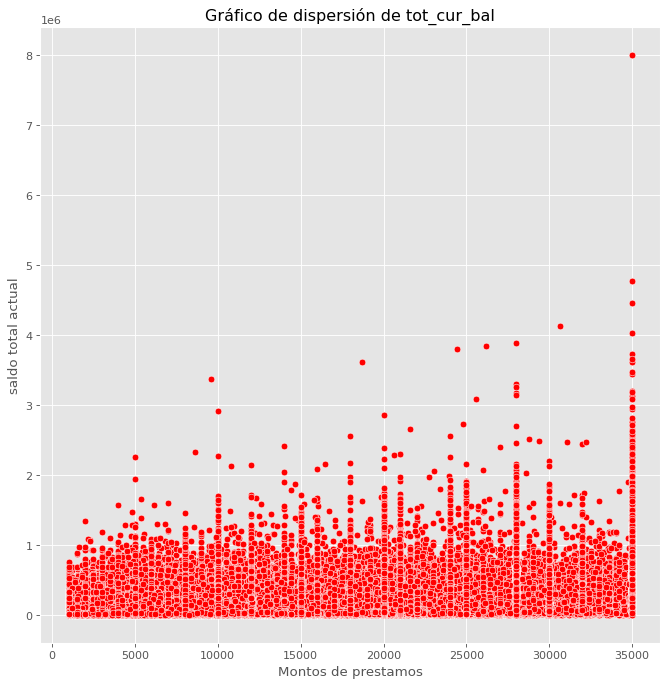

In [33]:
# Visualizar el gráfico de dispersión utilizando Seaborn de la columna 'tot_cur_bal'
plt.figure(figsize=(10, 10), dpi=80)
sns.scatterplot(x=df["loan_amnt"], y=df["tot_cur_bal"], color="red")

# Agregar título y etiquetas a los ejes del gráfico de dispersión
plt.xlabel('Montos de prestamos')
plt.ylabel('saldo total actual')
plt.title('Gráfico de dispersión de tot_cur_bal')

# Mostrar el gráfico de dispersión
plt.show()

In [ ]:
# La variable con más valores representativos es "tot_cur_bal" la media es un valor alto a la moda, e influirá mucho en los valores, a loc ual se opta por la moda, el mas frecuente traerá menos impacto en nuestro conjunto de valores.

In [35]:
#Imputación de valores faltantes, rellenamos con valores más frecuentes traerá menos impacto y será más representativo.
from sklearn.impute import SimpleImputer

#  Se imputará con MODA mas fecuente
imputar = SimpleImputer(strategy = "most_frequent")
imputar

SimpleImputer(strategy='most_frequent')

In [36]:
# transformamos
df[:] = imputar.fit_transform(df)

In [ ]:
#otro opcion de codigo de imputacion
#imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
#imp.fit(df[imputar])

In [37]:
 # Revisamos ahora nuestra completitud del archivo ya eliminado información incompleta menor al 80% y ya imputado
print(f"El % de completitud es: {df.count().sum() / df.size * 100:.2f}%")

El % de completitud es: 100.00%


In [38]:
# Nuestros datos al principio del analisis (887379, 74) bajaron las columnas a 47
df.shape

(887379, 47)

In [ ]:
# Ya con nuestro archivo completo vemos y analizamos la correlación de nuestros datos

<ipython-input-39-3479d168f42a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


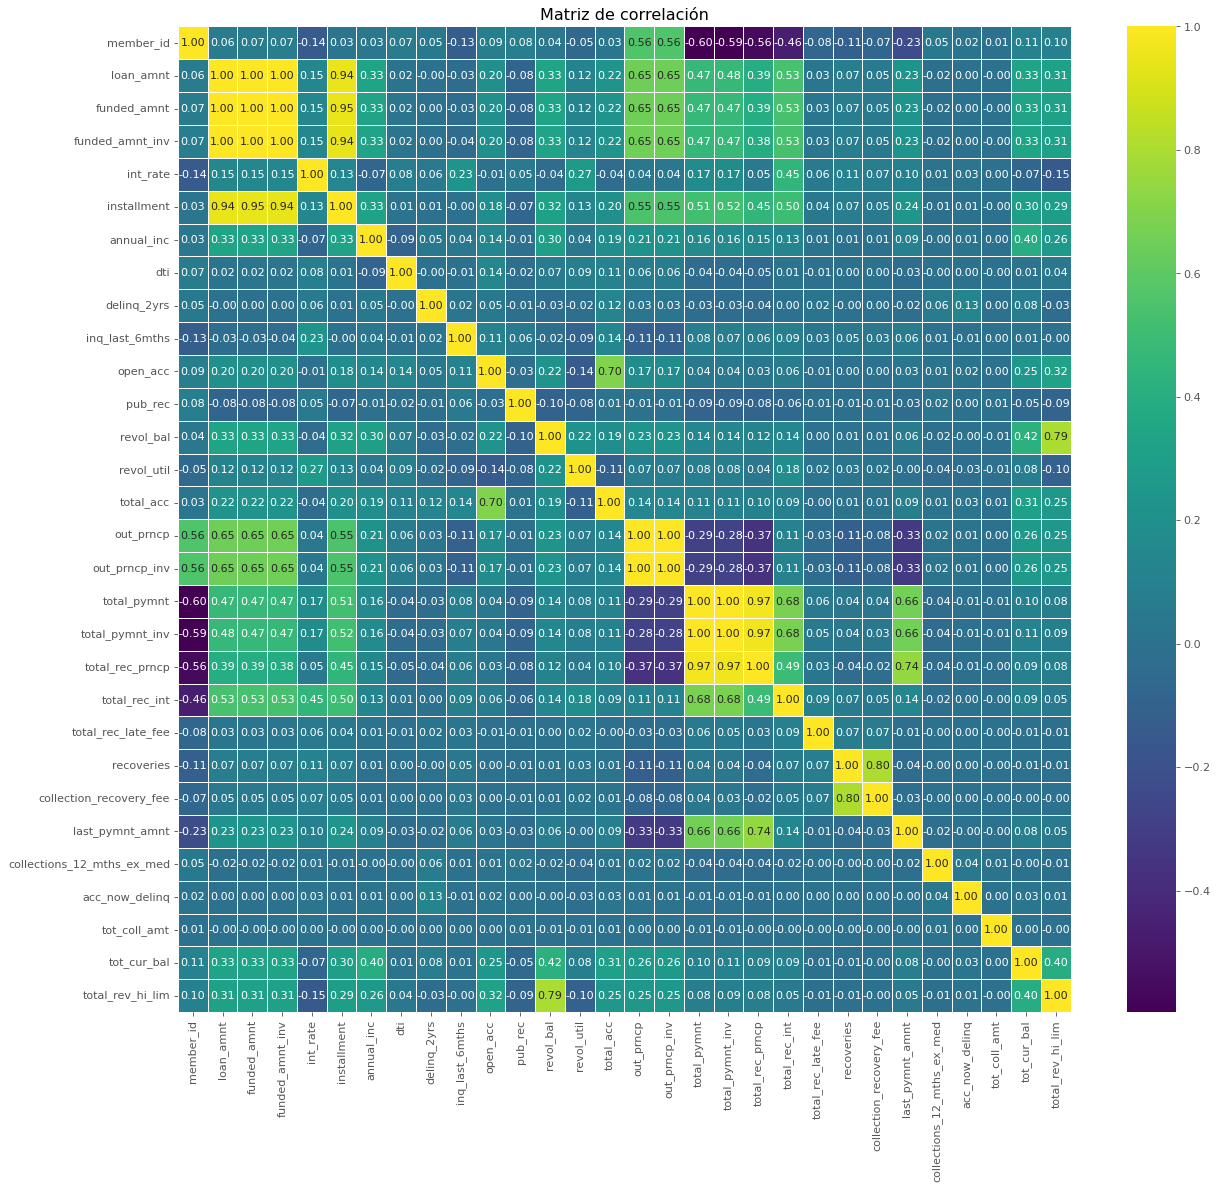

In [39]:
# Creamos nuestra variable
corr = df.corr()

# gráfico de correlación con un mapa de colores personalizado "viridis"
plt.figure(figsize=(18, 16), dpi=80)  # Ajustar el tamaño del gráfico
sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# título
plt.title("Matriz de correlación")

# Mostrar el gráfico
plt.show();


In [40]:
corr = df.corr()

# Calculamos el promedio de correlación para cada columna con todas las demás columnas, en valor absoluto para no tomar los negativos
# se ordenan de mayor a manor con el fin de buscar nuestra variable objetivo
correlation_means = corr.abs().mean().sort_values(ascending=False)

print("Promedio de correlación de cada columna (de mayor a menor):")
print(correlation_means)


<ipython-input-40-d366e0156aec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Promedio de correlación de cada columna (de mayor a menor):
funded_amnt                   0.323975
loan_amnt                     0.323792
funded_amnt_inv               0.323742
installment                   0.311403
total_pymnt                   0.290733
total_pymnt_inv               0.290406
out_prncp                     0.275831
out_prncp_inv                 0.275826
total_rec_prncp               0.271070
total_rec_int                 0.245371
member_id                     0.201316
revol_bal                     0.195269
last_pymnt_amnt               0.191935
total_rev_hi_lim              0.189406
tot_cur_bal                   0.185000
annual_inc                    0.169631
total_acc                     0.163354
open_acc                      0.152810
int_rate                      0.136131
revol_util                    0.115324
recoveries                    0.098965
inq_last_6mths                0.088453
collection_recovery_fee       0.088313
pub_rec                       0.077911
dti 

In [ ]:
# Ocupare la columna "loan_amnt" como variable objetivo, para comprender qué factores influyen en el estado de los préstamos.
# Variable objetivo, el valor que se busca predecir: `loan_amnt`: Monto del préstamo solicitado.

In [41]:
# analisis estadistico de nuestra variable objetivo
df["loan_amnt"].describe().round(2)

count    887379.00
mean      14755.26
std        8435.46
min         500.00
25%        8000.00
50%       13000.00
75%       20000.00
max       35000.00
Name: loan_amnt, dtype: float64

In [42]:
# Frecuencia de datos de nuestra variable objetivo
df["loan_amnt"].value_counts()

10000.0    61837
12000.0    50183
15000.0    47210
20000.0    46932
35000.0    36368
           ...  
550.0          1
925.0          1
750.0          1
725.0          1
950.0          1
Name: loan_amnt, Length: 1372, dtype: int64

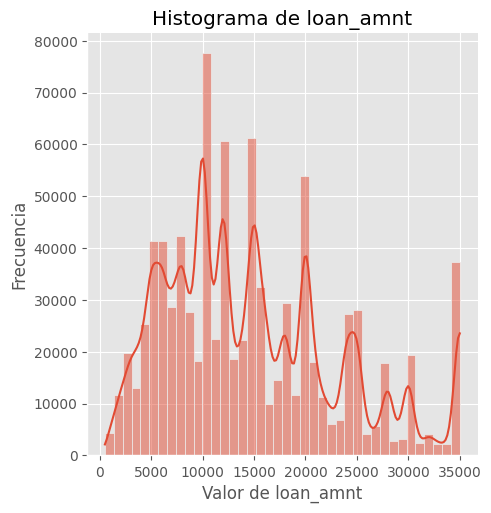

In [43]:
# Grafico de nuestra variable objetivo loan_amnt: Monto del préstamo solicitado.
sns.displot(df['loan_amnt'], kde=True, bins=40)

# Agregar título y etiquetas a los ejes del gráfico
plt.xlabel('Valor de loan_amnt')
plt.ylabel('Frecuencia')
plt.title('Histograma de loan_amnt')
plt.grid(True);

In [ ]:
# La gráfica de arriba es una histograma e indica cómo se comportan todos los números que están en la variable objetivo, llamado loan_amnt: Monto del préstamo solicitado.


In [44]:
# En nuestro analisis de nuestra variable revisamos su asimetria y curtosis.
print("Asimetría: %f" % df['loan_amnt'].skew())
print("Curtosis: %f" % df['loan_amnt'].kurt())

Asimetría: 0.681683
Curtosis: -0.256715


In [ ]:
# Observaciones:
# la curtosis es negativa, indica que la distribución es menos propensa a tener valores atípicos.
# La asimetría es positiva, pero menor a 1. Se asemeja a una distribución simétrica.

In [ ]:
# corr.info()

In [45]:
# mostramos el tipo de variable las separamos para agruparlas
obj_cols = []
int_cols = []
float_cols = []

for col in df.columns:
    if df[col].dtype == "object":
        obj_cols.append(col)
    elif df[col].dtype == "int64":
        int_cols.append(col)
    elif df[col].dtype == "float64":
        float_cols.append(col)

print("Variable continua (flotante):")
print(float_cols, "\n")

print("Variable discreta (Entero):")
print(int_cols, "\n")

print("Variable Categorica (String): ")
print(obj_cols, "\n")

Variable continua (flotante):
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'] 

Variable discreta (Entero):
['member_id'] 

Variable Categorica (String): 
['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'] 



In [46]:
# Creamos esta funcion que recibe nuestro df y nos renombra las columnas indentificandolas como continuas, discreta, categoricas (vista en clases)

def rename_cols(df, cols, prefix):
    new_columns = [prefix + col for col in cols]
    df = df.rename(columns=dict(zip(cols, new_columns)))
    return df

# Creamos listas con nuestras variables ya identificadas en el paso anterior
c_continua = ['int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
d_discreta = ['member_id', 'funded_amnt', 'funded_amnt_inv', 'revol_bal']
v_categorica = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']
tgt = ["loan_amnt"]

# Aquí asumimos que 'df' es tu DataFrame original
df = rename_cols(df, c_continua, "c_")
df = rename_cols(df, d_discreta, "d_")
df = rename_cols(df, v_categorica, "cat_")
df = rename_cols(df, tgt, "tgt_")


In [47]:
# Vemos como quedo nuestro dataframe ya reenombrado
df.head(3)

,d_member_id,tgt_loan_amnt,d_funded_amnt,d_funded_amnt_inv,cat_term,c_int_rate,c_installment,cat_grade,cat_emp_length,cat_home_ownership,...,c_collection_recovery_fee,cat_last_pymnt_d,c_last_pymnt_amnt,cat_last_credit_pull_d,c_collections_12_mths_ex_med,cat_application_type,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim
0,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,...,0.00,Jan-2015,171.62,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,0.0,15000.0
1,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,...,1.11,Apr-2013,119.66,Sep-2013,0.0,INDIVIDUAL,0.0,0.0,0.0,15000.0
2,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,...,0.00,Jun-2014,649.91,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,0.0,15000.0


In [48]:
# Revisamos filtrando por variable categorica
df.filter(like = "c_").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   c_int_rate                    887379 non-null  float64
 1   c_installment                 887379 non-null  float64
 2   c_annual_inc                  887379 non-null  float64
 3   c_dti                         887379 non-null  float64
 4   c_delinq_2yrs                 887379 non-null  float64
 5   c_inq_last_6mths              887379 non-null  float64
 6   c_open_acc                    887379 non-null  float64
 7   c_pub_rec                     887379 non-null  float64
 8   c_revol_bal                   887379 non-null  float64
 9   c_revol_util                  887379 non-null  float64
 10  c_total_acc                   887379 non-null  float64
 11  c_out_prncp                   887379 non-null  float64
 12  c_out_prncp_inv               887379 non-nul

In [49]:
# Revisamos filtrando por variable discreta
df.filter(like = "d_").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   d_member_id        887379 non-null  int64  
 1   d_funded_amnt      887379 non-null  float64
 2   d_funded_amnt_inv  887379 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 20.3 MB


In [50]:
# Cambiamos el tipo de dato
df["d_funded_amnt_inv"] = df["d_funded_amnt_inv"].astype(np.int64)

In [51]:
# Cambiamos el tipo de dato
df["d_funded_amnt"] = df["d_funded_amnt"].astype(np.int64)

In [52]:
# Revisamos filtrando por variable discreta haya cambiado correctamente
df.filter(like = "d_").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   d_member_id        887379 non-null  int64
 1   d_funded_amnt      887379 non-null  int64
 2   d_funded_amnt_inv  887379 non-null  int64
dtypes: int64(3)
memory usage: 20.3 MB


In [53]:
# Revisamos filtrando por variable categorica
df.filter(like = "cat_").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   cat_term                 887379 non-null  object
 1   cat_grade                887379 non-null  object
 2   cat_emp_length           887379 non-null  object
 3   cat_home_ownership       887379 non-null  object
 4   cat_verification_status  887379 non-null  object
 5   cat_issue_d              887379 non-null  object
 6   cat_loan_status          887379 non-null  object
 7   cat_pymnt_plan           887379 non-null  object
 8   cat_purpose              887379 non-null  object
 9   cat_title                887379 non-null  object
 10  cat_zip_code             887379 non-null  object
 11  cat_addr_state           887379 non-null  object
 12  cat_earliest_cr_line     887379 non-null  object
 13  cat_initial_list_status  887379 non-null  object
 14  cat_last_pymnt_d    

In [54]:
# Función outliers vista en clases

def OUTLIERS(df,cols):
    results=pd.DataFrame()
    data_iqr=df.copy()
    data_per=df.copy()
    total=[]
    total_per=[]
    total_z=[]
    indices_=[]

    for col in cols:
        #IQR
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        INF=Q1-1.5*(IQR)
        SUP=Q3+1.5*(IQR)


        n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
        total.append(n_outliers)
        indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)
        #data_iqr=data_iqr[~(data_iqr[col] < INF) | (data_iqr[col] > SUP)].reset_index(drop=True)

        #Percentiles
        INF_pe=np.percentile(df[col].dropna(),5)

        SUP_pe=np.percentile(df[col].dropna(),95)
        n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
        total_per.append(n_outliers_per)
        indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
        #data_per=data_per[~(data_per[col] < INF_pe) | (data_per[col] > SUP_pe)].reset_index(drop=True)

        #MEAN CHANGE

        #Obtenemos todos los percentiles además del máximo
        perc_100 = [x / 100 for x in range(100)]
        dist = df[col].describe(perc_100).iloc[4:]
        #Obtenemos el cambio entre percentiles
        change_dist = df[col].describe(perc_100).iloc[4:].diff()
        #Obtenemos el cambio promedio entre percentiles
        mean_change = df[col].describe(
            perc_100).iloc[4:].diff().mean()
        #Si el cambio entre el percentil 99 y el máximo es mayor a el cambio promedio entonces:
        if change_dist["max"] > mean_change:
            #La banda superior será el máximo menos el cambio promedio
            ub = dist["max"] - mean_change
            #si la banda superior es más pequeña que el percentil 99 , modificamos la banda para que tome el percentil 99
            if ub < dist["99%"]:
                ub = dist["99%"]
        else:
        #9Si el cambio entre el percentil 9 y el máximo es menor o igual a el cambio promedio entonces se toma el percentil 99
            ub = dist["max"]

        if change_dist["1%"] > mean_change:
            lb = dist["0%"] + mean_change
            if lb > dist["1%"]:
                lb = dist["1%"]
        else:
            lb = dist["0%"]
        n_total_z=df[(df[col] < lb) | (df[col] > ub)].shape[0]
        total_z.append(n_total_z)
        indices_z=list(df[(df[col] < lb) | (df[col] > ub)].index)

        indices_.append(aux_outliers(indices_iqr,indices_per,indices_z))

    results["features"]=cols
    results["n_outliers_IQR"]=total
    results["n_outliers_Percentil"]=total_per
    results["n_outliers_Mean_Change"]=total_z
    results["n_outliers_IQR_%"]=round((results["n_outliers_IQR"]/df.shape[0])*100,2)
    results["n_outliers_Percentil_%"]=round((results["n_outliers_Percentil"]/df.shape[0])*100,2)
    results["n_outliers_Mean_Change_%"]=round((results["n_outliers_Mean_Change"]/df.shape[0])*100,2)
    results["indices"]=indices_
    results["total_outliers"]=results["indices"].map(lambda x:len(x))
    results["%_outliers"]=results["indices"].map(lambda x:round(((len(x)/df.shape[0])*100),2))
    results=results[['features', 'n_outliers_IQR', 'n_outliers_Percentil',
       'n_outliers_Mean_Change', 'n_outliers_IQR_%', 'n_outliers_Percentil_%',
       'n_outliers_Mean_Change_%',  'total_outliers', '%_outliers','indices']]
    return results

def aux_outliers(a,b,c):
    a=set(a)
    b=set(b)
    c=set(c)

    a_=a.intersection(b)

    b_=b.intersection(c)

    c_=a.intersection(c)

    outliers_index=list(set(list(a_)+list(b_)+list(c_)))
    return outliers_index

In [ ]:
# tenemos 2 opciones eliminar nuestros datos atipicos (outliers) o completar con la mediana ese valor atipico
# Se opta por lo visto en clases eliminar registro de outliers

In [55]:
# eliminamos los valores atipicos de cada columna con variables continuas, ya que nuestra variable objetivo es continua "loan_amnt"

outliers=OUTLIERS(df,list(df.filter(like="c_").columns))
outliers

,features,n_outliers_IQR,n_outliers_Percentil,n_outliers_Mean_Change,n_outliers_IQR_%,n_outliers_Percentil_%,n_outliers_Mean_Change_%,total_outliers,%_outliers,indices
0,c_int_rate,6308,83192,112,0.71,9.38,0.01,6308,0.71,"[327680, 753667, 327684, 819204, 557063, 32769..."
1,c_installment,23149,88608,80,2.61,9.99,0.01,23227,2.62,"[524291, 393233, 655380, 131102, 655398, 52432..."
2,c_annual_inc,39719,84768,1,4.48,9.55,0.00,39719,4.48,"[524292, 655374, 524306, 655380, 262167, 39324..."
3,c_dti,81,88687,2,0.01,9.99,0.00,81,0.01,"[524288, 542724, 541704, 519691, 555531, 48590..."
4,c_delinq_2yrs,170389,23614,1,19.20,2.66,0.00,23614,2.66,"[131086, 655381, 27, 131100, 524318, 393249, 1..."
5,c_inq_last_6mths,53834,16436,1,6.07,1.85,0.00,16436,1.85,"[1, 65537, 393217, 688134, 294920, 753674, 425..."
6,c_open_acc,27478,80113,8,3.10,9.03,0.00,27485,3.10,"[524289, 655367, 524296, 524305, 524313, 65538..."
7,c_pub_rec,135778,22512,1,15.30,2.54,0.00,22512,2.54,"[262145, 262153, 524304, 524309, 655386, 65539..."
8,c_revol_bal,48649,88734,1,5.48,10.00,0.00,44367,5.00,"[524289, 524292, 786437, 393237, 262167, 65538..."
9,c_revol_util,51,88302,1,0.01,9.95,0.00,51,0.01,"[811008, 487938, 404996, 808709, 283910, 49127..."


In [56]:
# Tenemos la cantidad de indicies con error atipico eliminados
indices=list(outliers["indices"].values)
indices=list(set(reduce(lambda x,y: x+y, indices)))
print("Cantidad de indicies con error atipico eliminados:", len(indices))

Cantidad de indicies con error atipico eliminados: 324803


In [57]:
# sacamos el promedio de estos
porcentaje_elimi = ((len(indices))/(df.shape[0]))*100
print(f"{porcentaje_elimi:.2f}%")

36.60%


In [58]:
# Verificamos e indicamos si los índices están presentes en una lista de indices.
# el operador ~ (complemento lógico) para invertir los valores booleanos de la serie anterior. Ahora, los True indican que los índices NO están en la lista y False indica que sí están.
# resetean los indices y genera nuevos
df=df[~df.index.isin(indices)].reset_index(drop=True)

In [59]:
df.shape

(562576, 47)

In [ ]:
# Nuestros datos inicialmente eran (887379, 74)
# Luego de realizar los pasos de: completitud menores al 80%, imputamos y eliminados los datos atipicos
# quedamos en (562576, 47)

## Parte 3
Usa un transformador o los transformadores necesarios y justifica tu elección.

In [ ]:
# Me todo a ocupar StandarScaler

In [ ]:
# Ocupare el transformador por escalado, el cual estándariza los datos, ayuda a facilitar el procesamiento de los datos
# brindando un ajuste con una media de 0 y una std de 1, eso disminuiría el sesgo.

In [61]:
# Transformaremos variables numéricas

# Selecciona solo las columnas numéricas que deseas escalar
cols_numeric = ['c_int_rate', 'c_installment', 'c_annual_inc', 'c_dti', 'c_delinq_2yrs', 'c_inq_last_6mths', 'c_open_acc', 'c_pub_rec', 'c_revol_util', 'c_total_acc', 'c_out_prncp', 'c_out_prncp_inv', 'c_total_pymnt', 'c_total_pymnt_inv', 'c_total_rec_prncp', 'c_total_rec_int', 'c_total_rec_late_fee', 'c_recoveries', 'c_collection_recovery_fee', 'c_last_pymnt_amnt', 'c_collections_12_mths_ex_med', 'c_acc_now_delinq', 'c_tot_coll_amt', 'c_tot_cur_bal', 'c_total_rev_hi_lim','tgt_loan_amnt']

# Crea una instancia del transformador StandardScaler y escala las columnas numéricas generamos la cajita
normalizar = StandardScaler()
normalizar

StandardScaler()

In [62]:
# Aplicamos transformacion
df[cols_numeric] = normalizar.fit_transform(df[cols_numeric])

# Crea un nuevo DataFrame con las columnas escaladas
df_escalado = pd.DataFrame(df[cols_numeric], columns=cols_numeric)

In [63]:
df_escalado.head(2)

,c_int_rate,c_installment,c_annual_inc,c_dti,c_delinq_2yrs,c_inq_last_6mths,c_open_acc,c_pub_rec,c_revol_util,c_total_acc,...,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_collections_12_mths_ex_med,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim,tgt_loan_amnt
0,-0.520582,-1.106988,-1.386568,1.133618,-0.408801,0.527572,-1.752369,-0.409622,1.206888,-1.367191,...,0.0,0.0,0.0,-0.455358,0.0,0.0,-0.249347,-0.935402,-0.58764,-1.099653
1,0.798585,-1.523782,-1.815068,-1.133834,-0.408801,1.763344,-1.985024,-0.409622,1.835294,-1.267750,...,0.0,0.0,0.0,-0.258352,0.0,0.0,-0.249347,-0.935402,-0.58764,-1.481311


In [ ]:
# Visualiza los histogramas de las columnas escaladas (opción 1)
#df_escalado.hist()
# Muestra el gráfico
#plt.show()

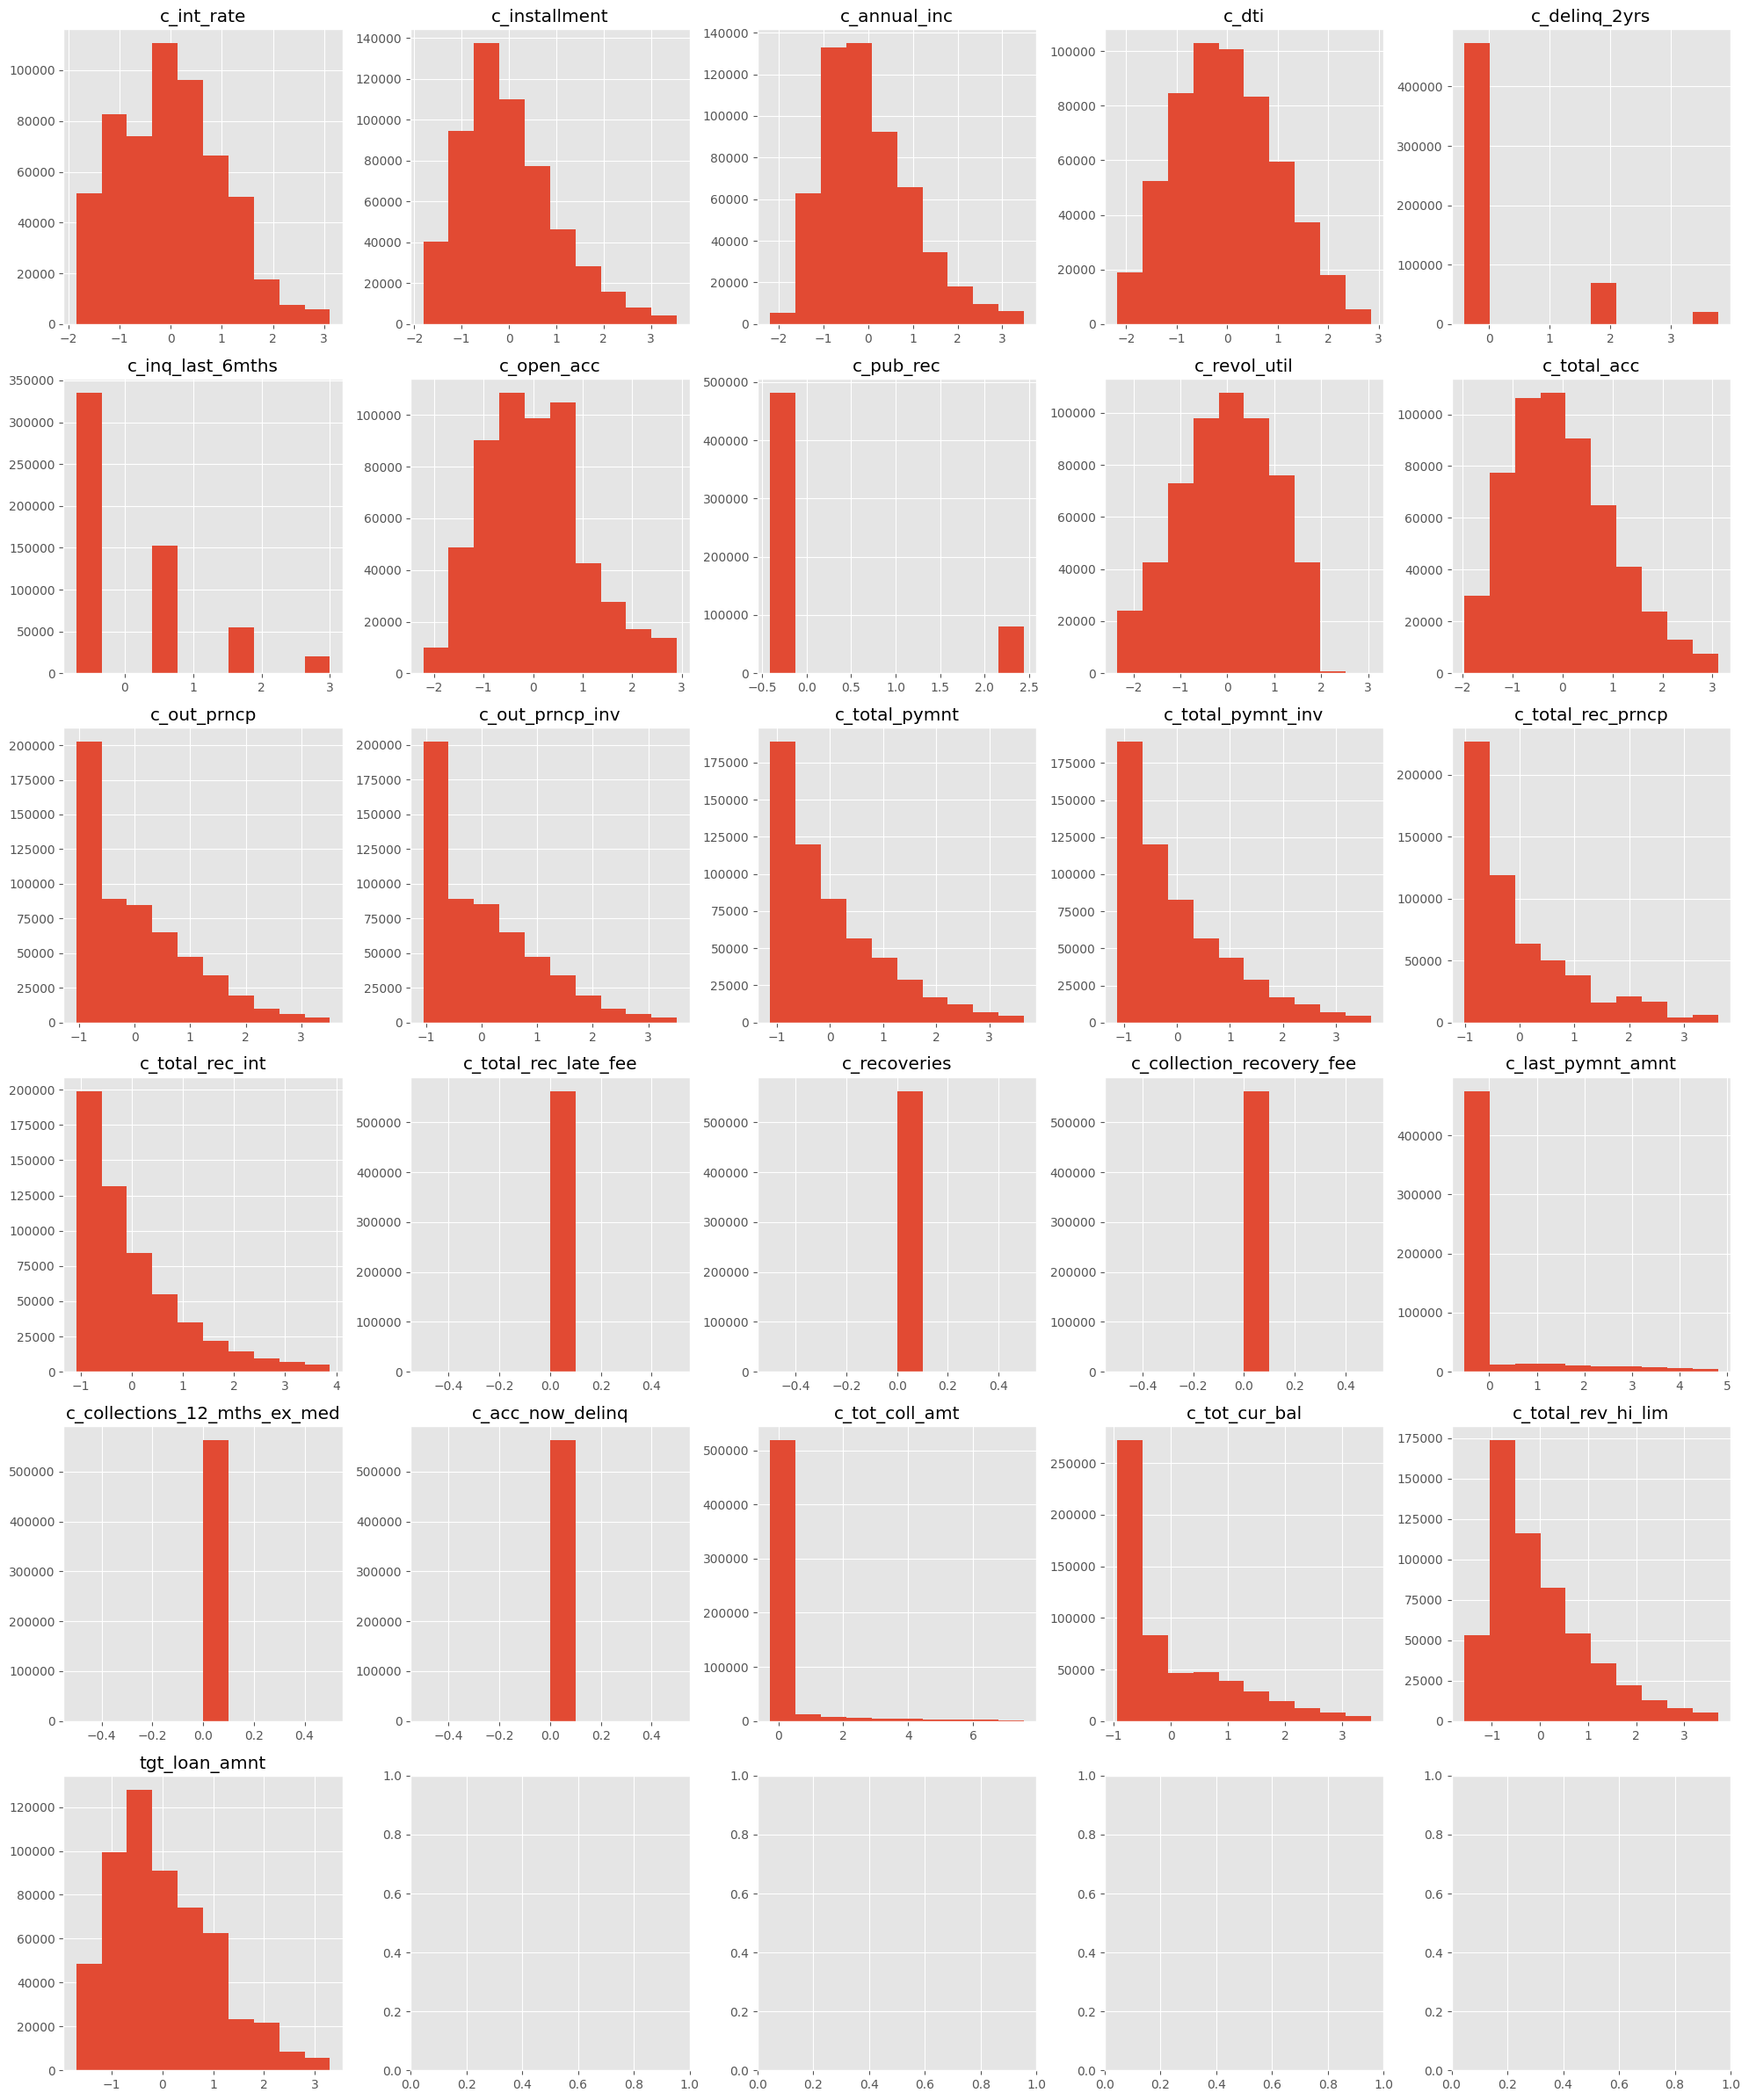

In [64]:
#  Visualizamos los histogramas de las columnas escaladas (opción 2)

import matplotlib.pyplot as plt
plt.style.use('ggplot')


# Calcular el número total de columnas y filas necesarias para mostrar los gráficos
num_cols = 5
num_rows = (len(df_escalado.columns) - 1) // num_cols + 1

# Crear una figura con subplots para cada columna
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4 * num_rows))

# Iterar a través de las columnas y trazar cada una en un subplot diferente
for i, col in enumerate(df_escalado.columns):
    ax = axes[i // num_cols, i % num_cols]
    df_escalado[col].hist(ax=ax, bins=10)  # Trazar el histograma de la columna actual
    ax.set_title(col)  # Agregar el título del subplot con el nombre de la columna

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


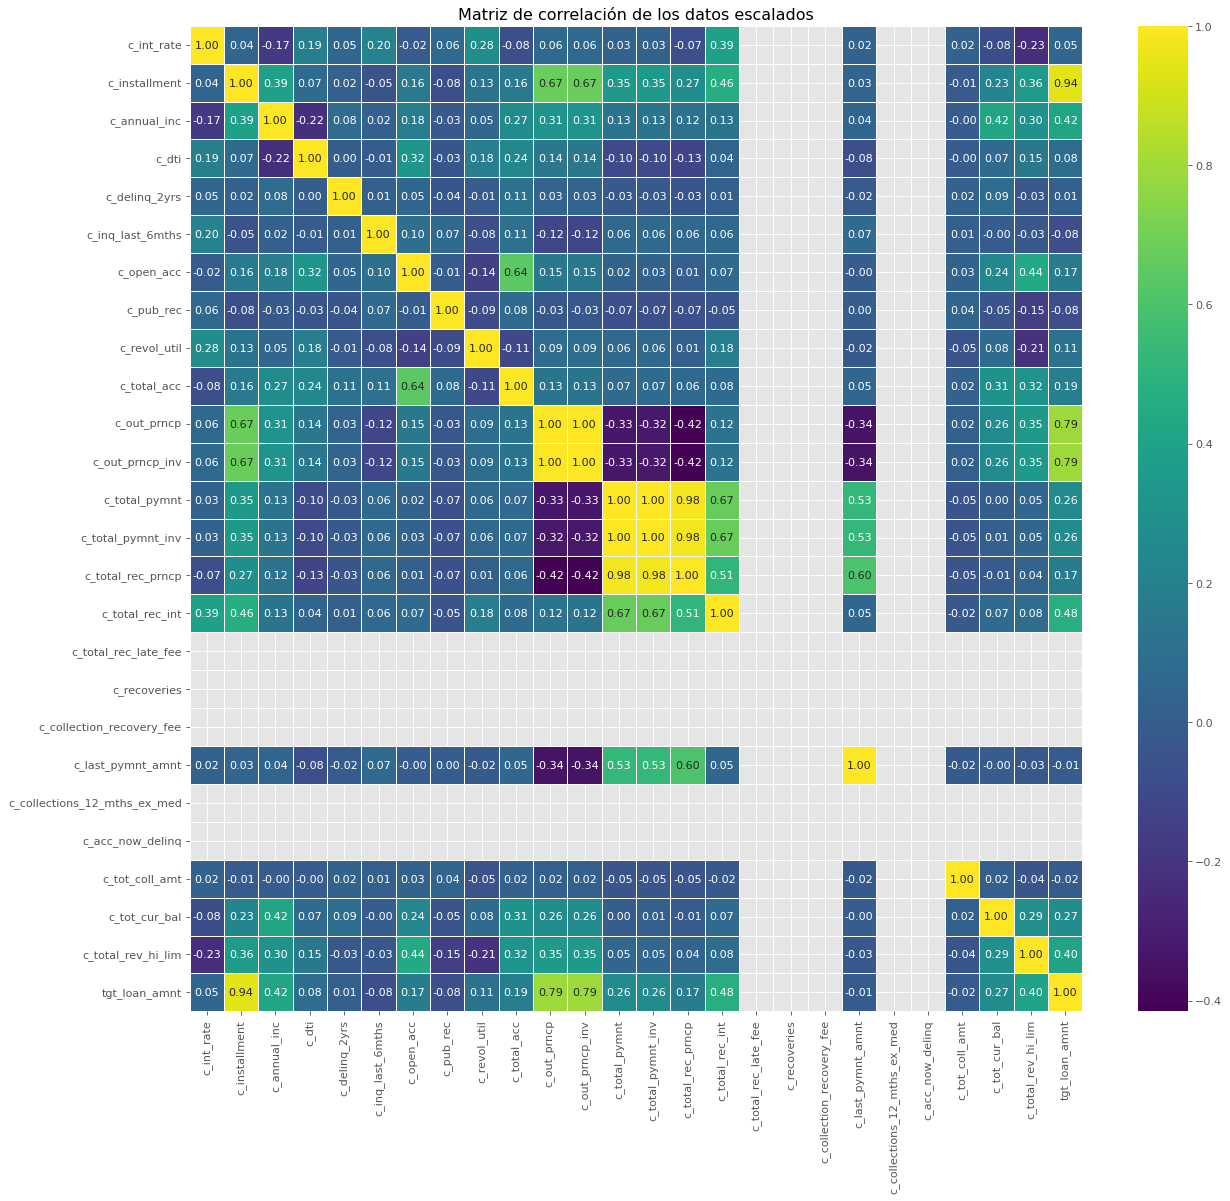

In [65]:
# Graficamos matriz de correlacion de nuestras columnas escaladas
df_escalado = pd.DataFrame(df[cols_numeric], columns=cols_numeric)
corr_matrix = df_escalado.corr()

# gráfico de correlación con un mapa de colores personalizado
plt.figure(figsize=(18, 16), dpi=80)  # Ajustar el tamaño del gráfico
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# título
plt.title("Matriz de correlación de los datos escalados")

# Mostrar el gráfico
plt.show()

<Figure size 2880x2560 with 0 Axes>

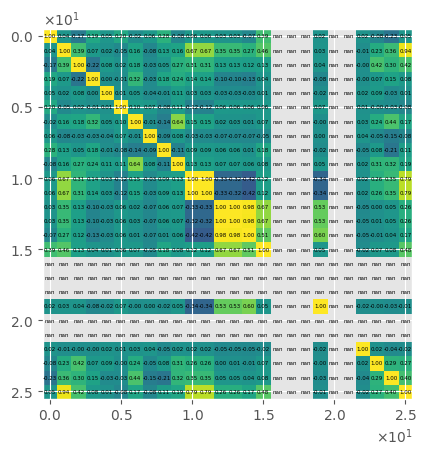

In [66]:
# Alternativa 2
#data = pd.DataFrame(np.random.randn(10, 5))
#df_escalado = pd.DataFrame(df[numeric_cols], columns=numeric_cols)
data = pd.DataFrame(df[cols_numeric], columns=cols_numeric)
corr_matrix = data.corr()

# Fragmento de código que utiliza corr_matrix
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(36, 32), dpi=80)  # Ajustar el tamaño del gráfico (doble tamaño)
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, cmap="viridis", vmin=-1, vmax=1)

# Añadir los valores del mapa de calor
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        text = ax.text(j, i, '{:.2f}'.format(corr_matrix.iloc[i, j]), ha='center', va='center', color='black', fontsize=4)

# Configurar el formatter
formatter = ScalarFormatter(useMathText=True)
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

# Configurar el formato científico
ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0), useOffset=False)

# Mostrar la figura
plt.show()

Se pueden generar dummies(One-Hot Encoding de variables categóricas) para las variables categóricas para posteriormente usarse como parte del estudio. Se queda comentada porque utiliza muchos recursos al ser para diversas variables.

In [ ]:
# #Crear un dataframe temporal con las columnas de las variables categóricas
# df_cat = df[['cat_grade', 'cat_emp_length', 'cat_home_ownership', 'cat_verification_status', 'cat_issue_d', 'cat_loan_status', 'cat_pymnt_plan', 'cat_purpose', 'cat_title', 'cat_zip_code', 'cat_addr_state', 'cat_earliest_cr_line', 'cat_initial_list_status', 'cat_last_pymnt_d', 'cat_last_credit_pull_d', 'cat_application_type']]
#
# # Convertir las variables categóricas en variables dummy (one-hot encoding)
# df_cat_dummies = pd.get_dummies(df_cat, drop_first=True)
#
# # Concatenar las variables dummy con el dataframe original
# df_final = pd.concat([df, df_cat_dummies], axis=1)

In [ ]:
# Para nuestras variables categoricas, ocuparemos el metodo, El One-Hot Encoding es una técnica de procesamiento de datos utilizada para convertir variables categóricas en una representación numérica binaria.
# Crea columnas binarias separadas para cada categoría única en la variable categórica original, donde un valor de 1 representa la presencia de la categoría y un valor de 0 la ausencia.
#'cat_loan_status'
# Ejemplo de un dommie solo una columna

columna = 'cat_grade'
temp_df = pd.get_dummies(df[columna], prefix=columna)
temp_df

,cat_grade_A,cat_grade_B,cat_grade_C,cat_grade_D,cat_grade_E,cat_grade_F,cat_grade_G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
562571,0,0,0,1,0,0,0
562572,0,1,0,0,0,0,0
562573,0,1,0,0,0,0,0
562574,0,0,0,1,0,0,0


## Parte 4

Selecciona la mejor técnica para reducir las dimenciones y justifica por qué debe reducirse. Se recomienda indicar el número de dimensiones óptimo.

> Recuerda incluir en tu análisis los gráficos adecuados para comunicar lo que deseas expresar. Para favorecer tu entendimiento del programa, se sugiere el uso de comentarios (#) en cada bloque de código.



In [67]:
# Metodo a ocupar para reduccion de dimension será PCA ya que esta combina las columnas existentes para crear nuevas, al tiempo que conserva las características de las originales.

import pandas as pd
from sklearn.preprocessing import StandardScaler


# Selecciona las columnas que deseas usar para el PCA
columnas = ['c_int_rate', 'c_installment', 'c_annual_inc', 'c_dti', 'c_delinq_2yrs', 'c_inq_last_6mths',
            'c_open_acc', 'c_pub_rec', 'c_revol_util', 'c_total_acc', 'c_out_prncp', 'c_out_prncp_inv',
            'c_total_pymnt', 'c_total_pymnt_inv', 'c_total_rec_prncp', 'c_total_rec_int', 'c_total_rec_late_fee',
            'c_recoveries', 'c_collection_recovery_fee', 'c_last_pymnt_amnt', 'c_collections_12_mths_ex_med',
            'c_acc_now_delinq', 'c_tot_coll_amt', 'c_tot_cur_bal', 'c_total_rev_hi_lim']

# Almacenamos nuetras columnas de datos en una variable filas
filas = df[columnas]

# Creamos el objeto StandardScaler generamos la cajita
scaler = StandardScaler()
scaler

StandardScaler()

In [68]:
# Estandarizamos los datos
filas_norm = scaler.fit_transform(filas)
# Muestro redondeando a digitos
filas_norm.round(2)

array([[-0.52, -1.11, -1.39, ..., -0.25, -0.94, -0.59],
       [ 0.8 , -1.52, -1.82, ..., -0.25, -0.94, -0.59],
       [-0.01, -1.61,  0.66, ..., -0.25, -0.94, -0.59],
       ...,
       [-0.19,  2.26,  0.62, ..., -0.25,  0.43, -0.9 ],
       [ 0.81, -0.29, -0.99, ..., -0.25, -0.6 , -0.39],
       [-0.19,  1.55,  1.39, ..., -0.25, -0.61,  1.16]])

In [69]:
filas_norm.shape

(562576, 25)

In [ ]:
# Tenemos un arreglo con 25 columnas

In [70]:
# Creamos el objeto PCA con 2 componentes
pca = PCA(n_components=2)

In [73]:
# generamos la cajita
pca

PCA(n_components=2)

In [74]:
# Aplicamos PCA a los datos estandarizados
pca_resultados = pca.fit_transform(filas_norm)
# Obtenemos 2 columnas con los datos
pca_resultados

array([[ 0.31622239, -2.84676178],
       [-0.25522949, -3.6450498 ],
       [-0.49647581, -1.18753212],
       ...,
       [ 1.06329559,  1.92044637],
       [-1.0305974 , -0.42097871],
       [ 0.47693107,  1.54583044]])

In [75]:
# Creamos un DataFrame con los componentes principales del arreglo, renombramos los nombres de la columnas
df_pca = pd.DataFrame(data = pca_resultados, columns = ['Componente 1', 'Componente 2'])
# Nueva columna nombrada muestra
df_pca['Muestra'] = df.index
# Muestro redondeando a digitos
print(df_pca.head().round(2))

   Componente 1  Componente 2  Muestra
0          0.32         -2.85        0
1         -0.26         -3.65        1
2         -0.50         -1.19        2
3          0.43         -2.71        3
4          1.23         -1.61        4


In [76]:
df_pca.shape

(562576, 3)

In [77]:
# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

Varianza explicada por cada componente:
[0.20835736 0.17898919]


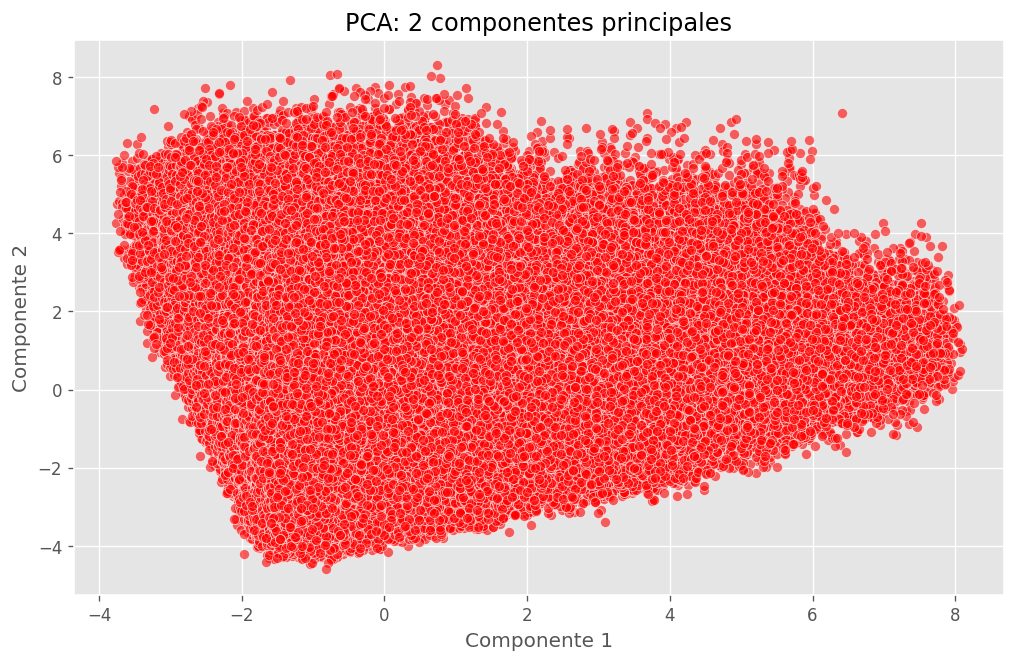

In [78]:
# Visualizar el gráfico de dispersión utilizando Seaborn de la columna 'tot_cur_bal'
plt.figure(figsize=(10, 6), dpi=120)
# tenemos 562576 valores que los represenatremos en el grafico de dispersion
sns.scatterplot(x=df_pca['Componente 1'], y=df_pca['Componente 2'], color="red", alpha=0.6)

# Agregar título y etiquetas a los ejes del gráfico de dispersión
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA: 2 componentes principales')

# Mostrar el gráfico de dispersión
plt.show()

In [ ]:
#El gráfico resultante mostrará los datos en un nuevo sistema de coordenadas donde el eje x representa la primera componente principal (PC1) y el eje y representa la segunda componente principal (PC2). La información original de las tres dimensiones se ha proyectado en este nuevo espacio de dos dimensiones.

In [79]:
# Visualizar los primeros registros del DataFrame de PCA
print(df_pca.head())

   Componente 1  Componente 2  Muestra
0      0.316222     -2.846762        0
1     -0.255229     -3.645050        1
2     -0.496476     -1.187532        2
3      0.433123     -2.710218        3
4      1.230828     -1.607644        4


In [80]:
# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

Varianza explicada por cada componente:
[0.20835736 0.17898919]


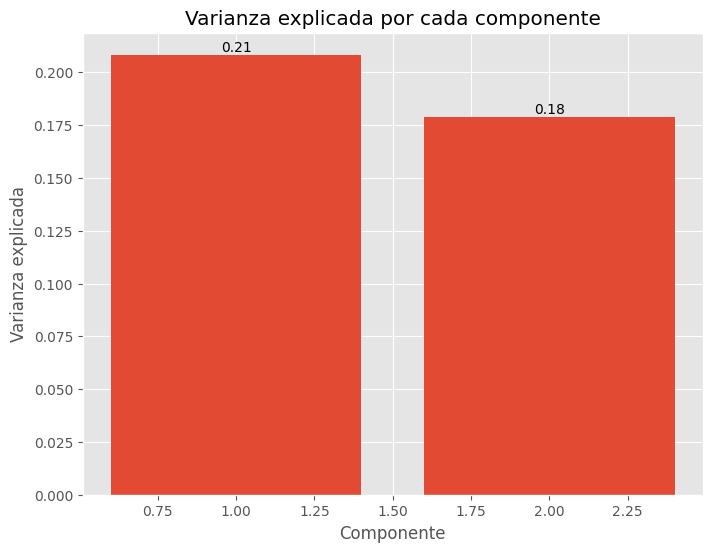

In [81]:
# Gráfico de barras de la varianza explicada por cada componente
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)

# Agregar el valor sobre cada barra
for i, varianza_explicada in enumerate(pca.explained_variance_ratio_):
    plt.text(i + 1, varianza_explicada, f'{varianza_explicada:.2f}', ha='center', va='bottom')


plt.xlabel('Componente')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por cada componente')
plt.grid(True)
plt.show()

Porcentaje de varianza explicada acumulada:  [0.20835736 0.38734655]


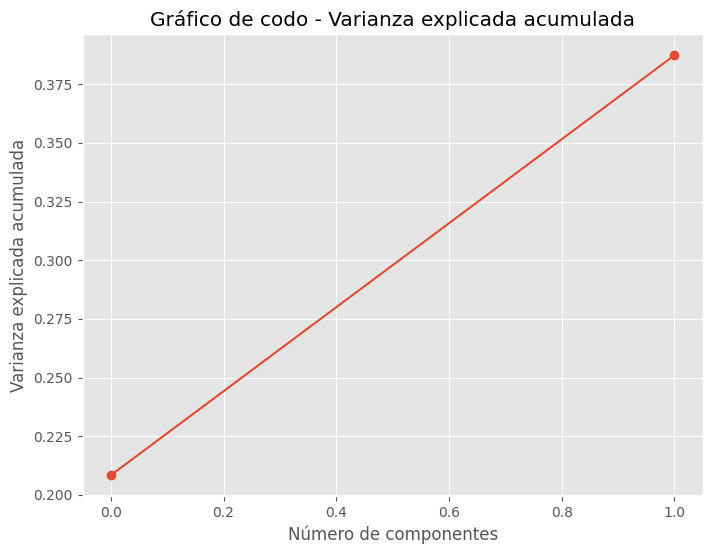

In [82]:
vari_acum = pca.explained_variance_ratio_.cumsum()
print("Porcentaje de varianza explicada acumulada: ",vari_acum)

# Gráfico de codo (Varianza explicada acumulada)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')

plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Gráfico de codo - Varianza explicada acumulada')
plt.grid(True)
plt.show()

In [84]:
from sklearn.preprocessing import StandardScaler

# Definir las características que se utilizarán en el PCA
features = ['c_int_rate', 'c_installment', 'c_annual_inc', 'c_dti', 'c_delinq_2yrs',
            'c_inq_last_6mths', 'c_open_acc', 'c_pub_rec', 'c_revol_util', 'c_total_acc',
            'c_out_prncp', 'c_out_prncp_inv', 'c_total_pymnt', 'c_total_pymnt_inv',
            'c_total_rec_prncp', 'c_total_rec_int', 'c_total_rec_late_fee', 'c_recoveries',
            'c_collection_recovery_fee', 'c_last_pymnt_amnt', 'c_collections_12_mths_ex_med',
            'c_acc_now_delinq', 'c_tot_coll_amt', 'c_tot_cur_bal', 'c_total_rev_hi_lim']

# Obtener los datos que se utilizarán en el PCA
X = df[features].values
# Normalizar los datos utilizando StandardScaler generamos la cajita
scaler = StandardScaler()
scaler

StandardScaler()

In [85]:
# Estandarizamos los datos
X_std = scaler.fit_transform(X)
# Muestro redondeando a digitos
X_std.round(2)

array([[-0.52, -1.11, -1.39, ..., -0.25, -0.94, -0.59],
       [ 0.8 , -1.52, -1.82, ..., -0.25, -0.94, -0.59],
       [-0.01, -1.61,  0.66, ..., -0.25, -0.94, -0.59],
       ...,
       [-0.19,  2.26,  0.62, ..., -0.25,  0.43, -0.9 ],
       [ 0.81, -0.29, -0.99, ..., -0.25, -0.6 , -0.39],
       [-0.19,  1.55,  1.39, ..., -0.25, -0.61,  1.16]])

In [86]:
# Realiza el PCA con los datos normalizados generamos la cajita
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [87]:
# Transformamos
X_pca = pca.fit_transform(X_std)
X_pca.round(2)

array([[ 0.32, -2.85],
       [-0.26, -3.65],
       [-0.5 , -1.19],
       ...,
       [ 1.06,  1.92],
       [-1.03, -0.42],
       [ 0.48,  1.55]])

In [88]:
X_pca.shape

(562576, 2)

In [92]:
fig, ax = plt.subplots(figsize=(30,30))
for i, v in enumerate(pca.components_.T):
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=1, color='red')
    ax.text(v[0] * 1.2, v[1] * 1.2, f'Var{i+1}', color='black', ha='center', va='center', fontsize=12)

for i in range(X_pca.shape[0]):
    ax.scatter(X_pca[i,0], X_pca[i,1], color='blue')
    ax.text(X_pca[i,0] + 0.1, X_pca[i,1] + 0.1, f'Obs{i+1}', color='black', fontsize=10)

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Biplot del PCA')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

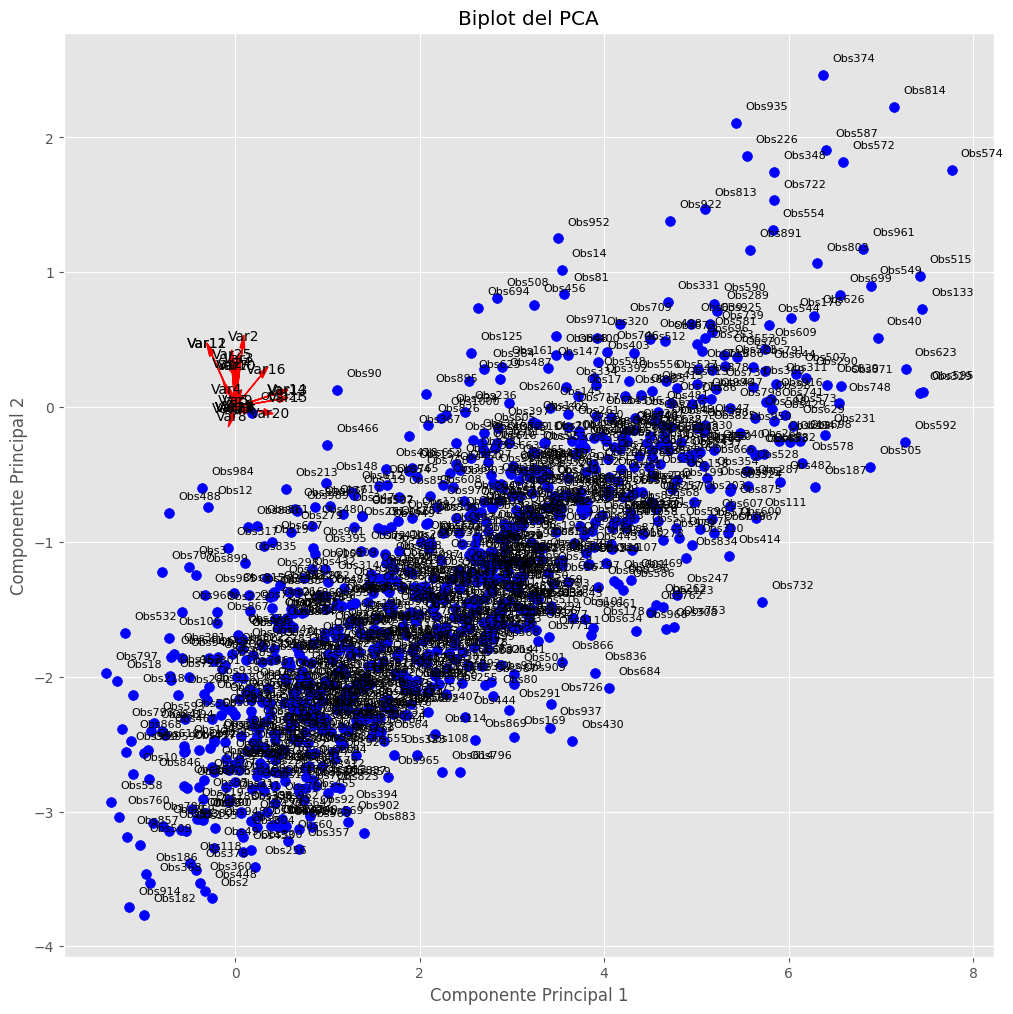

In [89]:
# Alternativa 2, reducida la cantidad de datos para mostrar, ya que se pega colab al ocupar mucho recurso
import matplotlib.pyplot as plt

# Suponiendo que ya tienes definidos los valores de pca.components_ y X_pca

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 12))

# Definir el número de observaciones a mostrar en el biplot (por ejemplo, las primeras 500 variables)
num_observations_to_show = 1000

# Mostrar las flechas y etiquetas de los componentes principales
for i, v in enumerate(pca.components_.T):
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=1, color='red')
    ax.text(v[0] * 1.2, v[1] * 1.2, f'Var{i+1}', color='black', ha='center', va='center', fontsize=10)

# Mostrar las observaciones en el biplot
for i in range(num_observations_to_show):
    ax.scatter(X_pca[i, 0], X_pca[i, 1], color='blue', marker='o', s=50)
    ax.text(X_pca[i, 0] + 0.1, X_pca[i, 1] + 0.1, f'Obs{i+1}', color='black', fontsize=8)

# Establecer etiquetas de los ejes y título
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Biplot del PCA')

# Mostrar el gráfico
plt.show()
